# Layouts tutorial 

The purpose of this turtorial is to illuminate the utility in graph layouts and offer insight into how they are produced. 



## The Pipeline

In esscence we want to go from a graph represented in matrix form into a good estimate of what it would look like with nodes and edges. 

This is primarily accomplished through first taking the given Graph matrix then embedding it. There are many differnt ways to embed. We will first use Node2Vec as that is supported with the currnet code. Other options include ASE and LSE. 

Once we have this embedded matrix which is nxd we must then down-project to two dimensions. This can be accomplished with either UMAP or TNSE which are different types of nonlinear manifold learning algorithms. 

We now have a matrix that is nx2. The next step would be to use sometimes to apply nooverlap(https://github.com/microsoft/graspologic/tree/dev/graspologic/layouts/nooverlap) to make sure that nodes do not appear on top of each other thus obfuscating the graph layout. 

This in effect creates a layout. One can optionally cluster and color the nodes using leiden. 

## About the callable functions and what they do and where they fit into above framework
``layout_tsne`` 

-- Automatic graph layout generation by creating a generalized node2vec embedding, then using t-SNE for dimensionality reduction to 2d space.

Show an example 

``layout_umap``

-- Automatic graph layout generation by creating a generalized node2vec embedding, then using UMAP for dimensionality reduction to 2d space.

-- Show an example  (one below?)

``categorical_colors``

-- Generates a node -> color mapping based on the partitions provided. The partitions are ordered by population descending, and a series of perceptually balanced, complementary colors are chosen in sequence.

``sequential_colors``

-- Generates a node -> color mapping where a color is chosen for the value as it maps the value range into the sequential color space.


``show_graph``

``draw_graph``



#### what is missing

Need to do an example for each of the main function calls - further explanation as to how it works..

Use some play data... will talk to Dwayne about getting some other data to be more intersting later


# Using TSNE
 By default, this function automatically attempts to prune each graph to a maximum
    of 10,000,000 edges by removing the lowest weight edges. This pruning is approximate
    and will leave your graph with at most ``max_edges``, but is not guaranteed to be
    precisely ``max_edges``.
    In addition to pruning edges by weight, this function also only operates over the
    largest connected component in the graph.
    After dimensionality reduction, sizes are generated for each node based upon
    their degree centrality, and these sizes and positions are further refined by an
    overlap removal phase. Lastly, a global partitioning algorithm
    (`graspologic.partition.leiden`) is executed for the largest connected
    component and the partition ID is included with each node position.
    
``layout_tsne`` handles a lot of the pipeline stated about all at once. In later iterations this will be broken down into more callable functions to allow for more access to intermediate realizations

## the paramters

graph : :class:`networkx.Graph` Create any graph object

for other intersting graphs look here https://networkx.org/documentation/stable/reference/generators.html

In [20]:
import networkx as nx
g = nx.newman_watts_strogatz_graph(10, 2, .6)
g.number_of_nodes()

10

``perplexity : int``
The perplexity is related to the number of nearest neighbors that is used in 
other manifold learning algorithms. 
Larger datasets usually require a larger perplexity. 
Perplexity is a sensitive paramter likely choice between 4 and 100; large datasets will need larger perplexity. 

Manifold learning helps with nonlinear projection to lower dimension

``max_edges : int`` default is 10000000 

``n_iter : int``
        Maximum number of iterations for the optimization. We have found in practice
        that larger graphs require more iterations. We hope to eventually have more
        guidance on the number of iterations based on the size of the graph and the
        density of the edge connections.
        
``random_seed : int`` set for reproducible results 

In [34]:
# You will notice  that we have to relabel the nodes here to be the string form of the int
# this is because ``leiden`` requires that all the nodes be strings 
di = {}
for i in range(len(list(g.nodes))):
    di[list(g.nodes)[i]] = str(list(g.nodes)[i])
g = nx.relabel_nodes(g, di)

In [35]:
from graspologic.layouts import layout_tsne
tupl = layout_tsne(g, perplexity = 3, n_iter = 250, random_seed = 23)

## coloring of nodes

Should you not want to color the nodes using any of the functionality in ``graspologic.layout``

In [36]:
import seaborn as sns
nodes = [str(i) for i in range(g.number_of_nodes())]
colors = sns.color_palette(n_colors = g.number_of_nodes())
node_to_color = dict(zip(nodes, colors))

You can also use ``categorical_colors`` or ``sequential_colors`` but that will be discussed later

## use show graph 

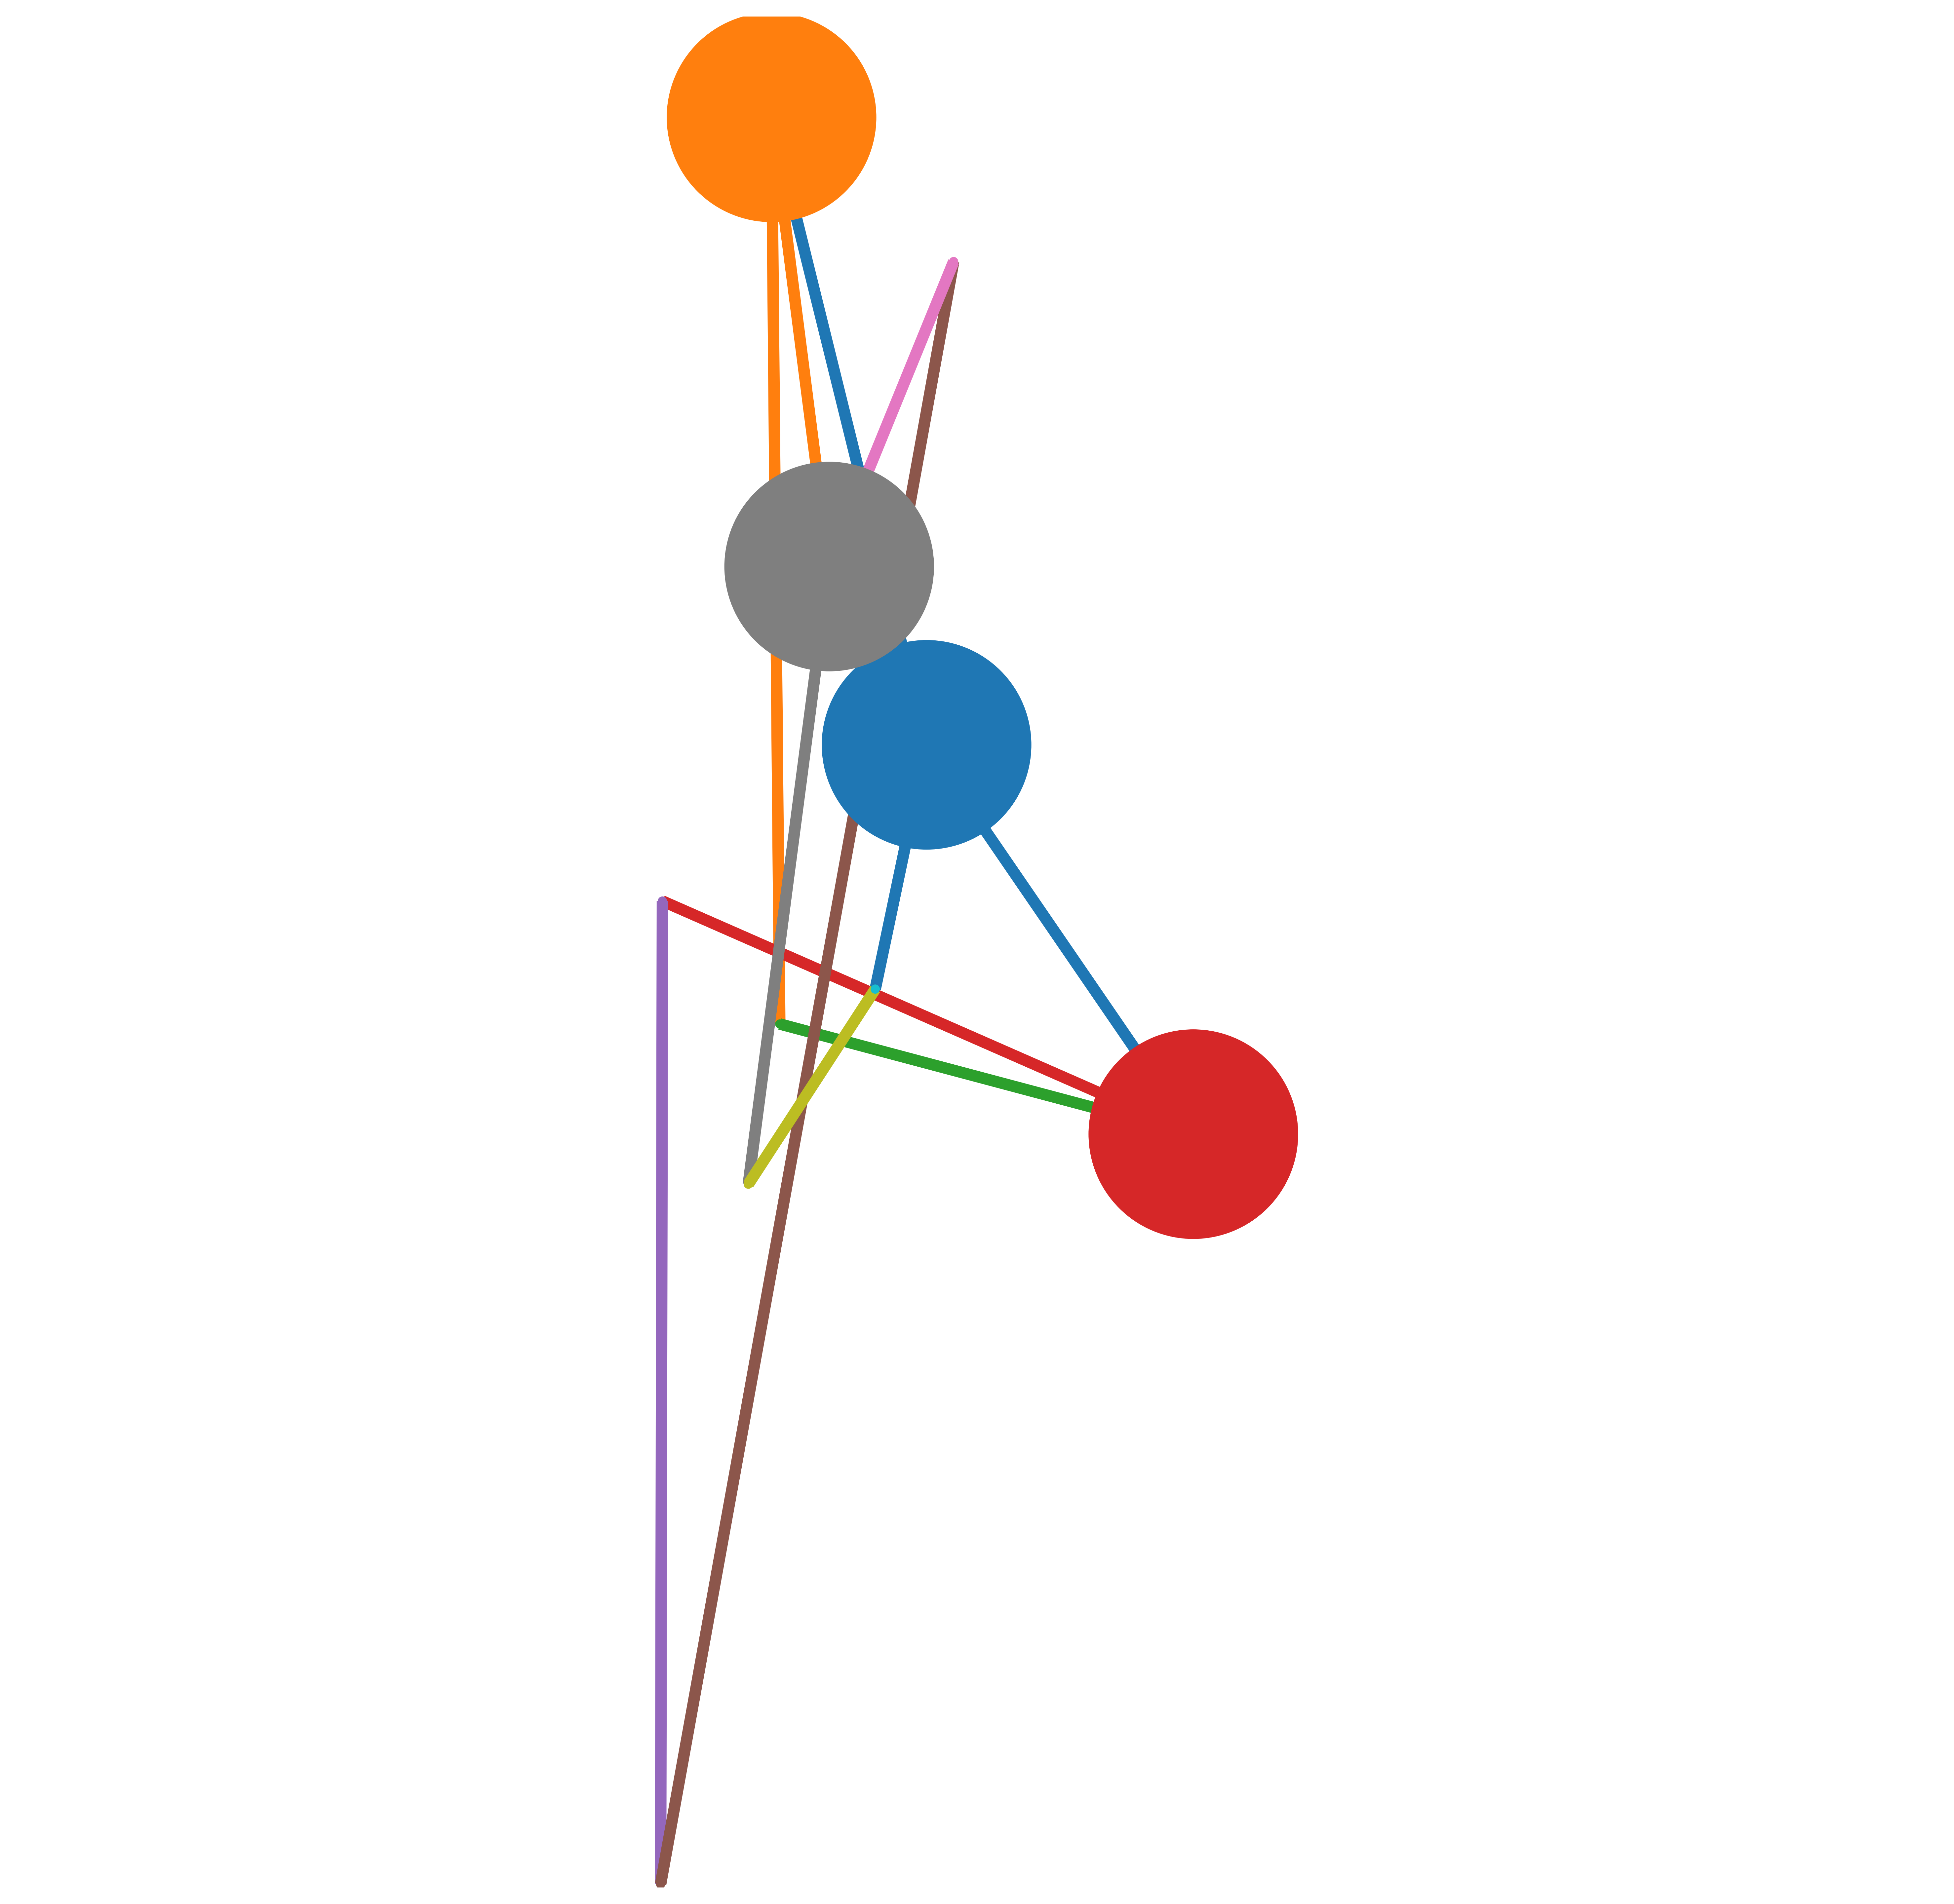

In [41]:
from graspologic.layouts import show_graph
show_graph(tupl[0], tupl[1], node_to_color, edge_line_width = 5, 
           edge_alpha=1, vertex_alpha = 1, light_background = True,vertex_line_width = 1 )

# Using UMAP

In [30]:
import networkx as nx
from graspologic.layouts import layout_umap
tupl = layout_umap(h)

C:\Users\dfran\miniconda3\lib\site-packages\umap\umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


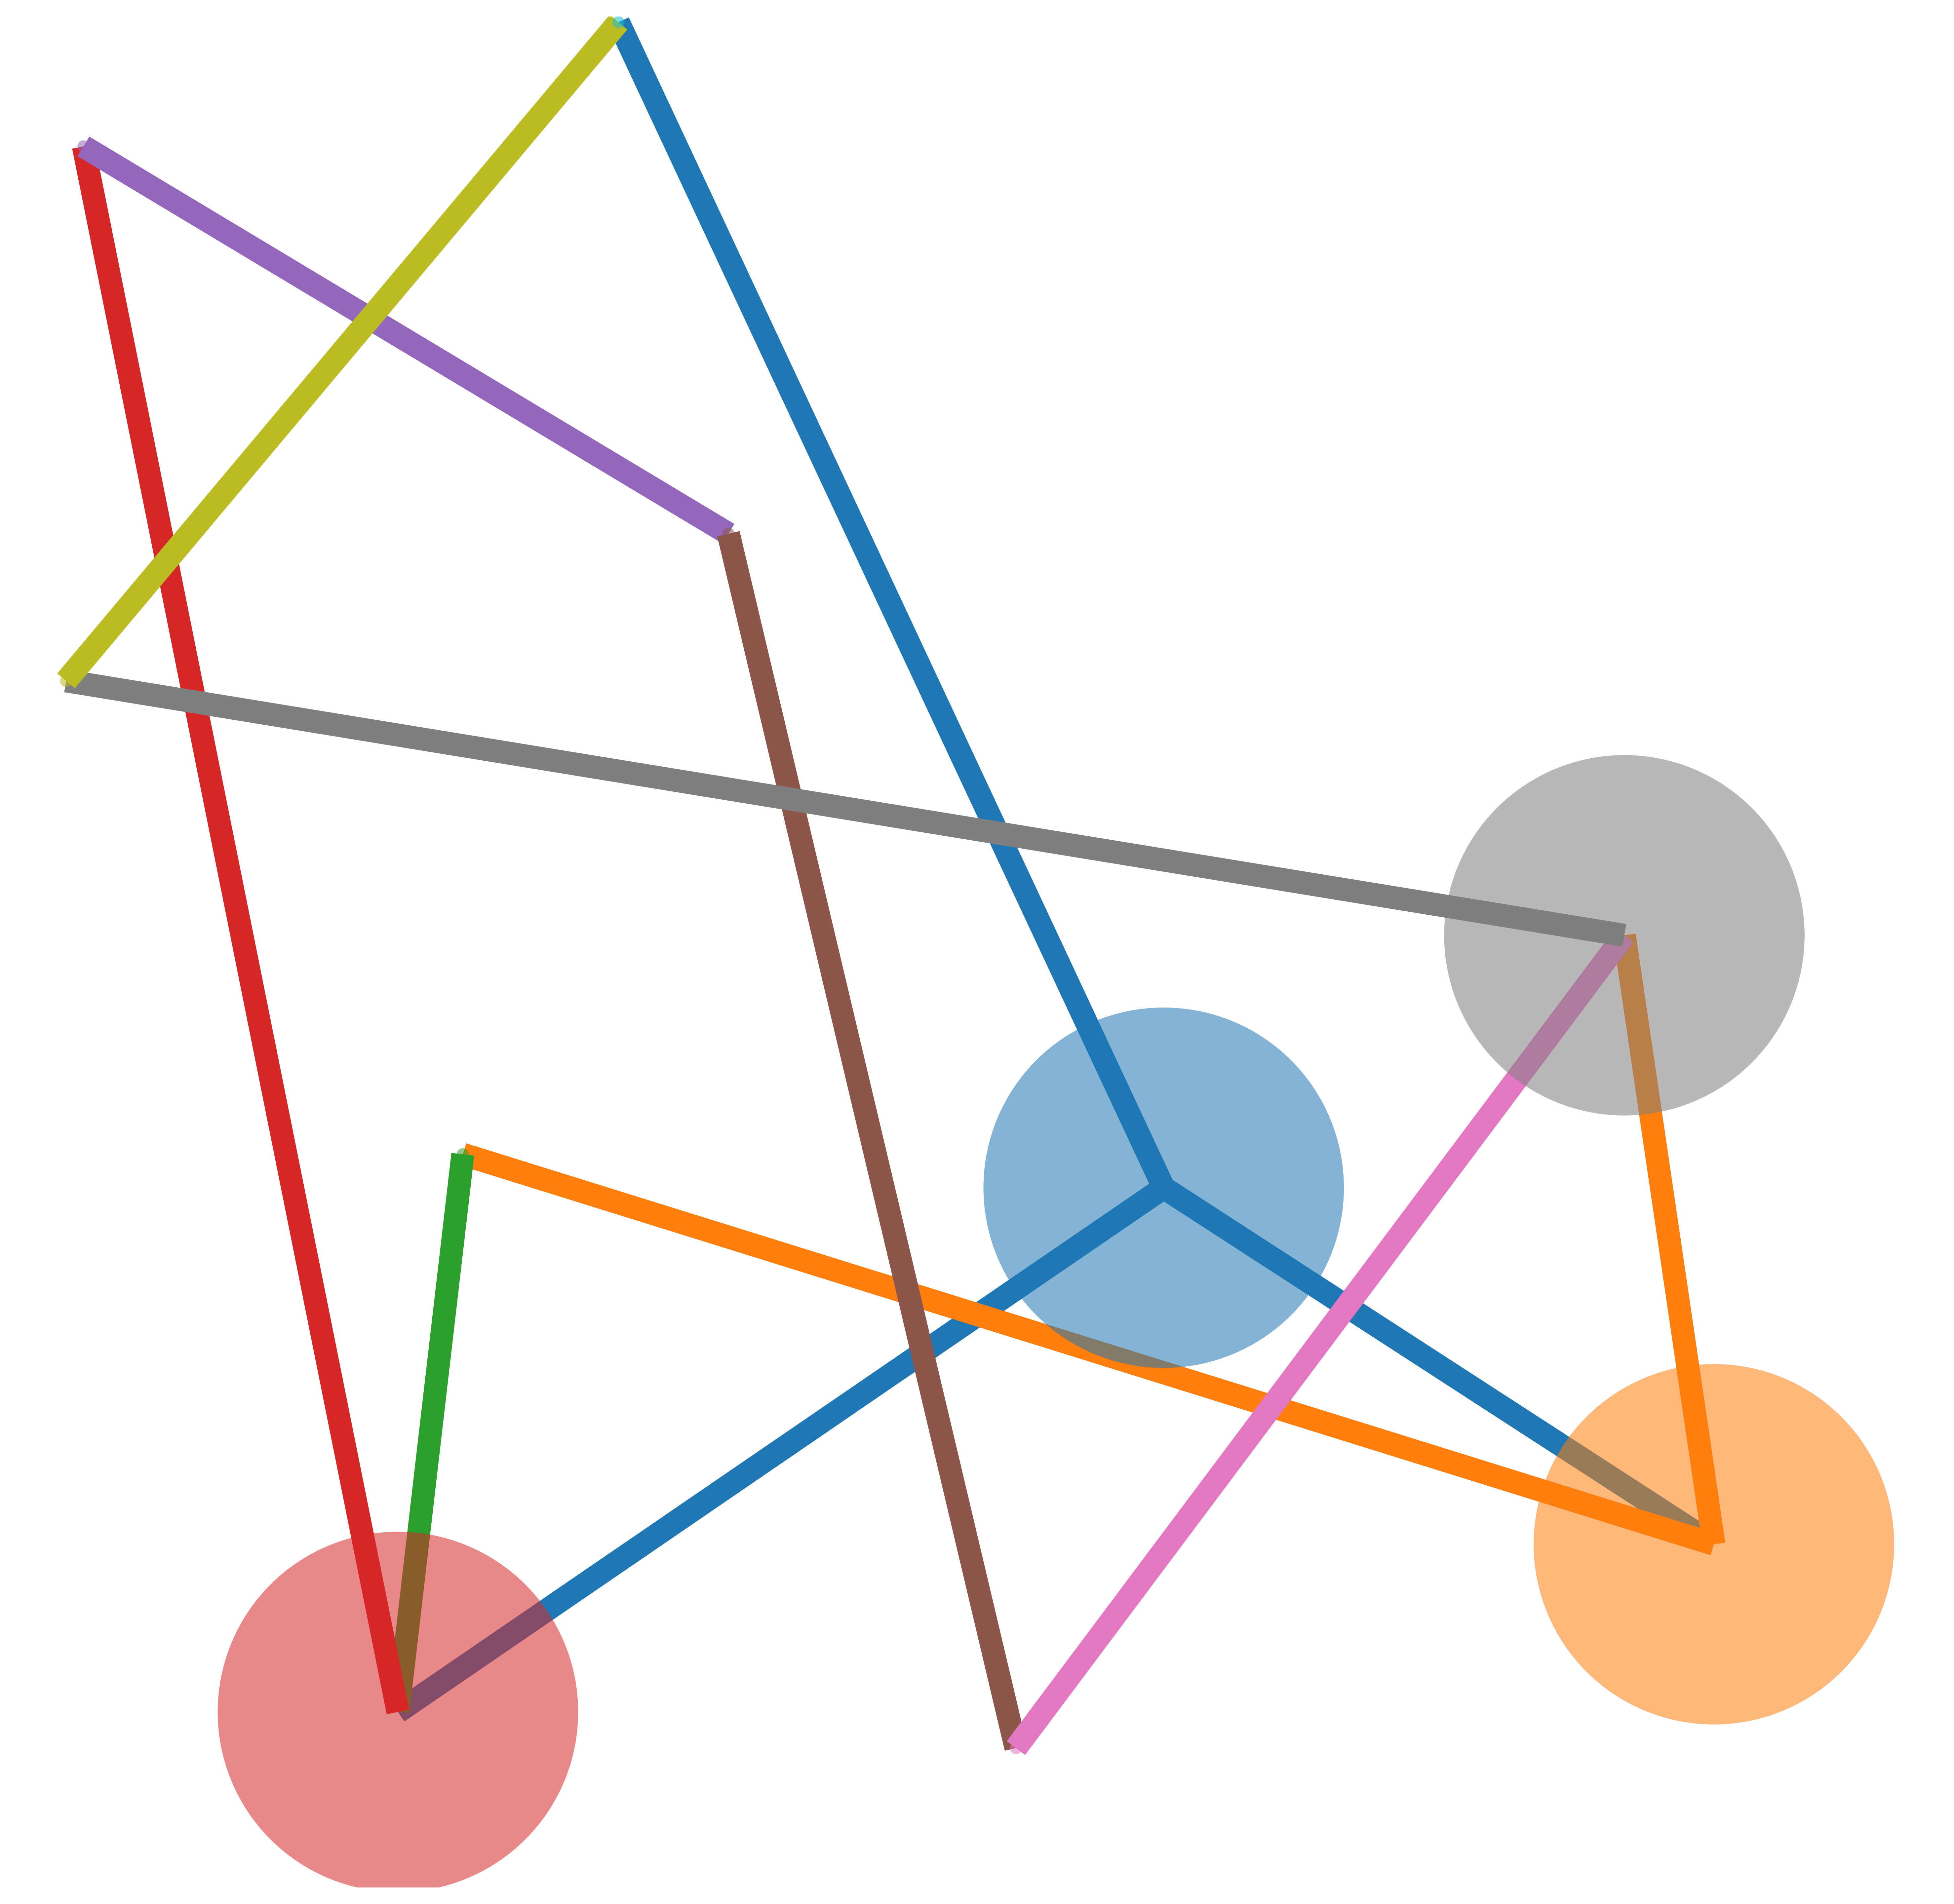

In [24]:
from graspologic.layouts import show_graph
show_graph(tupl[0], tupl[1], node_to_color, edge_line_width = 10, edge_alpha=1)

In [12]:
import numpy as np
from graspologic.layouts import categorical_colors
nodes = [str(i) for i in range(g.number_of_nodes())]
parts = list(np.random.randint(low = 0,high=3,size=5))
cat_cols = categorical_colors(dict(zip(nodes, parts)))